In [8]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd

In [3]:
data = fetch_20newsgroups(subset='train')

In [5]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [6]:
categories = [
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'alt.atheism',
 'soc.religion.christian',
]

In [7]:
dataset = fetch_20newsgroups(subset='train', 
                             categories=categories, 
                             remove=('headers', 'footers', 'quotes'))

In [11]:
dataset.data;

In [12]:
df = pd.DataFrame(dataset.data, columns=["corpus"])

In [15]:
df

,corpus
0,"\nThey tried their best not to show it, believ..."
1,\nStankiewicz? I doubt it.\n\nKoufax was one ...
2,\n[deletia- and so on]\n\nI seem to have been ...
3,"Excuse the sheer newbieness of this post, but ..."
4,==============================================...
...,...
3446,"\n Or, with no dictionary available, they cou..."
3447,\n\nSorry to disappoint you but the Red Wings ...
3448,\n: Can anyone tell me where to find a MPEG vi...
3449,\n


In [16]:
df.iloc[3,:].values

array(['Excuse the sheer newbieness of this post, but I am looking for a decent\nPaintProgram which will save to various file formats (.BMP  .PCX  etc etc)\nvia ftp, freeware, or shareware.  I would like to check out the available\nprograms for little $$ before I check out the commercial market.\n\nThanks in advance for any help or direction you can give me.'],
      dtype=object)

In [17]:
df.iloc[4,:].values

array(['==============================================================================\n'],
      dtype=object)

#### Pre-processing

In [19]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer

In [21]:
swords = stopwords.words('english')
ls = LancasterStemmer()

In [89]:
def clean_text(sent):
    tokens1 = word_tokenize(sent)
    tokens2 = [x.lower() for x in tokens1 if x.isalpha() or x.isdigit()]
    tokens3 = [x.lower() for x in tokens2 if x not in swords]
    tokens4 = [ls.stem(x) for x in tokens3]
    return tokens3

In [23]:
sent = 'Hello friends! Welcome to the world of Python Programming.'

In [24]:
clean_text(sent)

['hello', 'friend', 'welcom', 'world', 'python', 'program']

In [25]:
df.iloc[3,:].values[0]

'Excuse the sheer newbieness of this post, but I am looking for a decent\nPaintProgram which will save to various file formats (.BMP  .PCX  etc etc)\nvia ftp, freeware, or shareware.  I would like to check out the available\nprograms for little $$ before I check out the commercial market.\n\nThanks in advance for any help or direction you can give me.'

In [26]:
clean_text(df.iloc[3,:].values[0])

['excus',
 'she',
 'newby',
 'post',
 'look',
 'dec',
 'paintprogram',
 'sav',
 'vary',
 'fil',
 'form',
 'etc',
 'etc',
 'via',
 'ftp',
 'freew',
 'sharew',
 'would',
 'lik',
 'check',
 'avail',
 'program',
 'littl',
 'check',
 'commerc',
 'market',
 'thank',
 'adv',
 'help',
 'direct',
 'giv']

#### TF*IDF Vectorizer

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
tfidf = TfidfVectorizer(analyzer=clean_text)

In [32]:
x_vect = tfidf.fit_transform(df['corpus'])

In [33]:
x_vect

<3451x20753 sparse matrix of type '<class 'numpy.float64'>'
	with 198567 stored elements in Compressed Sparse Row format>

In [34]:
x_vect.shape

(3451, 20753)

#### Elbow Method

In [36]:
from sklearn.cluster import KMeans

In [37]:
km = KMeans(n_clusters=3)

In [38]:
labels = km.fit_predict(x_vect)

In [39]:
labels

array([0, 0, 2, ..., 1, 0, 0], dtype=int32)

In [40]:
km.inertia_

3243.685809643769

In [41]:
import matplotlib.pyplot as plt

In [42]:
sse = []
for k in range(1,16):
    km = KMeans(n_clusters=k)
    km.fit_predict(x_vect)
    sse.append(km.inertia_)

In [43]:
sse

[3285.020084122476,
 3263.878476587863,
 3243.669962972869,
 3227.907269235084,
 3219.526501961085,
 3205.3934615299927,
 3196.9466525283037,
 3188.6149644877896,
 3181.876274788426,
 3176.7753062066777,
 3172.399458419453,
 3168.6129521515677,
 3161.433781825507,
 3159.0841626464367,
 3151.852242169709]

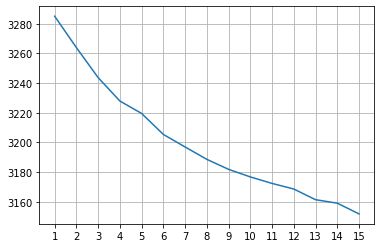

In [45]:
plt.grid()
plt.xticks(range(1,16))
plt.plot(range(1,16), sse)

#### Silhoutte Method

In [47]:
from sklearn.metrics import silhouette_score

In [49]:
silh = []
for k in range(2,16):
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(x_vect)
    score = silhouette_score(x_vect, labels)
    silh.append(score)

<BarContainer object of 14 artists>

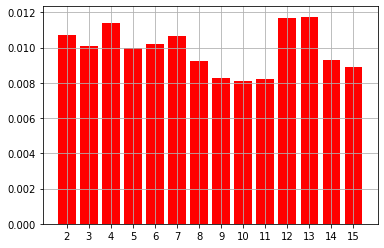

In [51]:
plt.grid()
plt.xticks(range(2,16))
plt.bar(range(2,16), silh, color = 'r')

#### Create the clusters

In [53]:
km = KMeans(n_clusters=6, random_state=0)

In [54]:
labels = km.fit_predict(x_vect)

In [55]:
labels

array([3, 3, 0, ..., 2, 3, 1], dtype=int32)

In [56]:
set(labels)

{0, 1, 2, 3, 4, 5}

In [57]:
km.labels_

array([3, 3, 0, ..., 2, 3, 1], dtype=int32)

In [58]:
km.cluster_centers_

array([[1.10968173e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.39671956e-03, 0.00000000e+00, 0.00000000e+00, ...,
        3.96660641e-04, 1.23189957e-03, 0.00000000e+00],
       [3.48888199e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.38099614e-03, 5.71675555e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.43619363e-04],
       [2.00335687e-03, 7.77149750e-05, 3.60537760e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.35358135e-01, 1.53959011e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [60]:
newdf = df.copy()

In [61]:
newdf['label'] = labels

In [62]:
newdf

,corpus,label
0,"\nThey tried their best not to show it, believ...",3
1,\nStankiewicz? I doubt it.\n\nKoufax was one ...,3
2,\n[deletia- and so on]\n\nI seem to have been ...,0
3,"Excuse the sheer newbieness of this post, but ...",4
4,==============================================...,3
...,...,...
3446,"\n Or, with no dictionary available, they cou...",3
3447,\n\nSorry to disappoint you but the Red Wings ...,1
3448,\n: Can anyone tell me where to find a MPEG vi...,2
3449,\n,3


In [63]:
df[labels==2]

,corpus
7,I just installed a new TrueType font under MS-...
8,This is the 2nd Reguest for Discussion ( RFD )...
9,\n\nSince running any GUI over a network is go...
15,\n\tThe VESA standard can be requested from VE...
23,"Hi Steve,\n\nAs the author of Multiverse, I fe..."
...,...
3434,\nIt's supposedly a high-performance chip base...
3435,"Hi there,\n\n\tDoes anyone know about any gree..."
3437,Hi!\n\nCould anyone tell me if it's possible t...
3443,Hi all News Group users:\nDoes anyone know whe...


In [66]:
print('0:',len(df[labels==0]))
print('1:',len(df[labels==1]))
print('2:',len(df[labels==2]))
print('3:',len(df[labels==3]))
print('4:',len(df[labels==4]))

0: 596
1: 603
2: 545
3: 1423
4: 214


#### Wordcloud for a cluster

In [80]:
from wordcloud import WordCloud
from nltk import FreqDist
from nltk.tokenize import word_tokenize

In [108]:
two = df[labels==2]

text=[]
for txt in two['corpus']:
    text.extend(clean_text(txt))

In [109]:
wordfreqdist = FreqDist(text)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('windows', 450), ('would', 224), ('use', 218), ('thanks', 216), ('know', 191), ('anyone', 185), ('card', 177), ('like', 171), ('using', 171), ('one', 159), ('problem', 156), ('get', 154), ('program', 148), ('please', 146), ('also', 140), ('graphics', 128), ('dos', 124), ('drivers', 121), ('help', 114), ('driver', 113), ('need', 112), ('software', 109), ('system', 105), ('version', 103), ('good', 91), ('could', 88), ('mode', 86), ('video', 85), ('new', 84), ('work', 83), ('run', 81), ('hi', 81), ('information', 81), ('1', 80), ('screen', 79), ('c', 78), ('memory', 76), ('2', 76), ('access', 75), ('want', 75), ('looking', 75), ('advance', 75), ('find', 73), ('problems', 73), ('ca', 70), ('used', 70), ('support', 70), ('think', 68), ('available', 68), ('running', 67)]


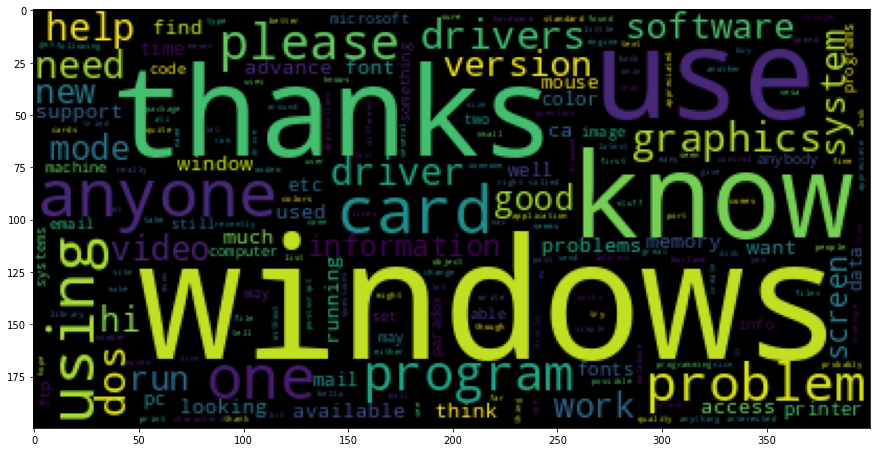

In [110]:
wc = WordCloud(collocations=False, 
               normalize_plurals=False).generate(" ".join(text))
plt.figure(figsize=(15,15))
plt.imshow(wc)

In [113]:
two = df[labels==3]

text=[]
for txt in two['corpus']:
    text.extend(clean_text(txt))

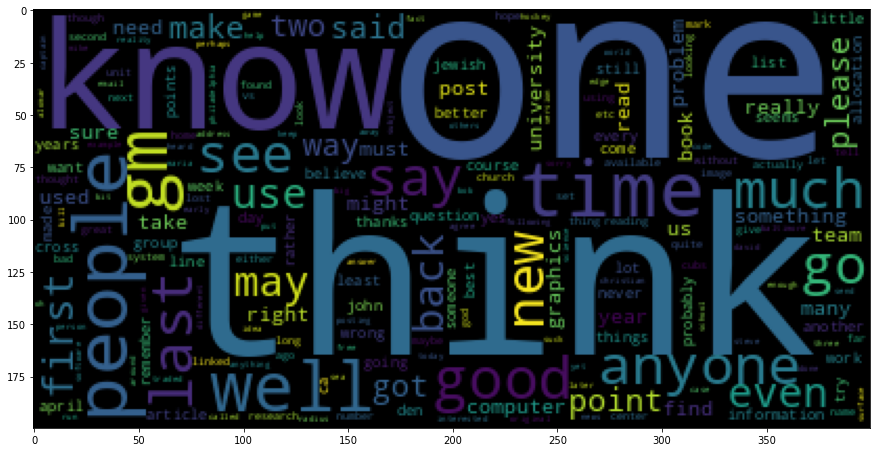

In [114]:
wc = WordCloud(collocations=False,
              normalize_plurals=False).generate(" ".join(text))
plt.figure(figsize=(15,15))
plt.imshow(wc)

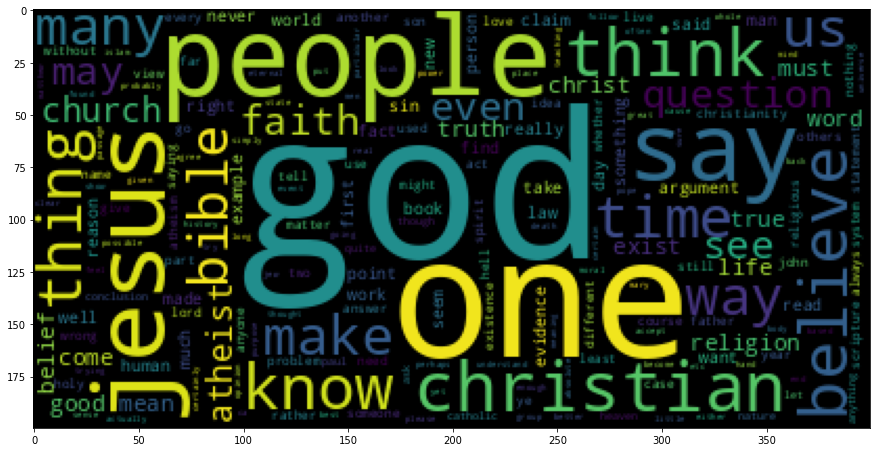

In [112]:
two = df[labels==0]

text=[]
for txt in two['corpus']:
    text.extend(clean_text(txt))
    
wc = WordCloud(collocations=False).generate(" ".join(text))
plt.figure(figsize=(15,15))
plt.imshow(wc)

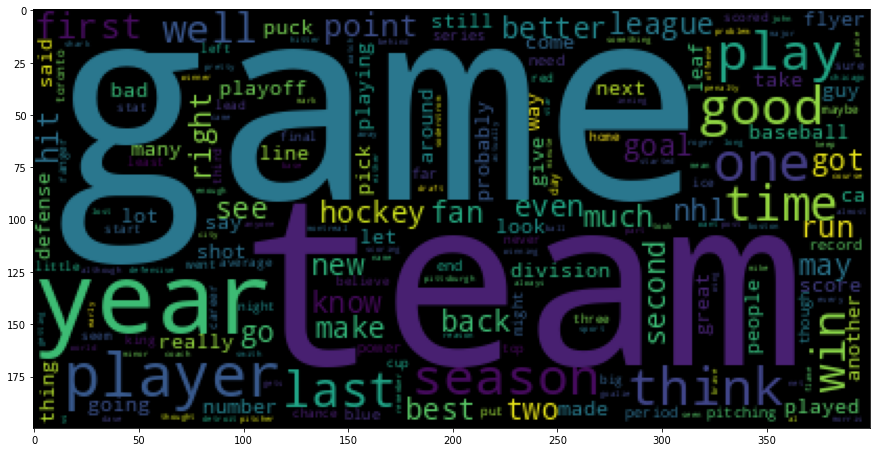

In [98]:
two = df[labels==1]

text=[]
for txt in two['corpus']:
    text.extend(clean_text(txt))
    
wc = WordCloud(collocations=False).generate(" ".join(text))
plt.figure(figsize=(15,15))
plt.imshow(wc)

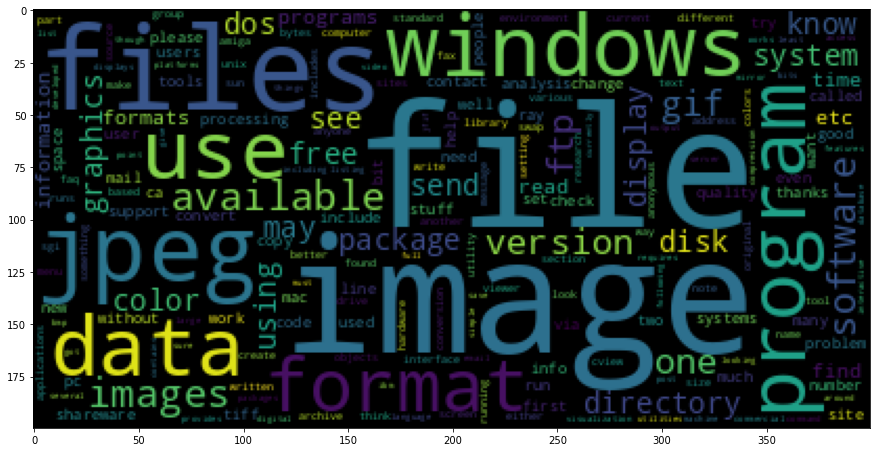

In [116]:
two = df[labels==4]

text=[]
for txt in two['corpus']:
    text.extend(clean_text(txt))
    
wc = WordCloud(collocations=False,
              normalize_plurals=False).generate(" ".join(text))
plt.figure(figsize=(15,15))
plt.imshow(wc)

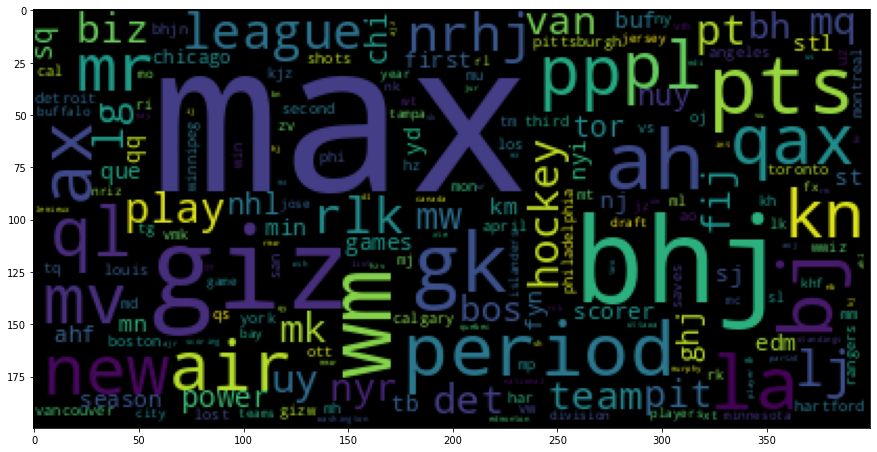

In [117]:
two = df[labels==5]

text=[]
for txt in two['corpus']:
    text.extend(clean_text(txt))
    
wc = WordCloud(collocations=False,
              normalize_plurals=False).generate(" ".join(text))
plt.figure(figsize=(15,15))
plt.imshow(wc)